In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
data = pd.read_csv("data/housing.csv")

In [20]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


## Basic Data Analysis

**Q1: How many entries there are?**

In [21]:
len(data)  # not to big dataset

5000

**Q2: What is the average house price?**

In [27]:
print("Mean House Price: {:.2f}".format(data["Price"].mean()))
print("Median House Price: {:.2f}".format(data["Price"].median()))

Mean House Price: 1232072.65
Median House Price: 1232669.38


I'm now going to visualize 2 variables that I'm going to use for Linear Regression model.

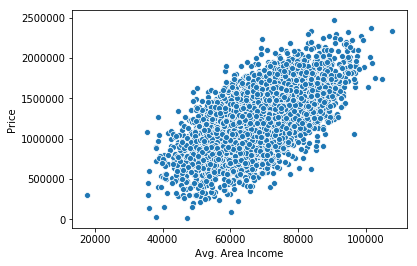

In [32]:
sns.scatterplot(x="Avg. Area Income", y="Price", data=data)

I'll create a copy of the dataset with only those two features:

In [33]:
linreg_data = data[["Avg. Area Income", "Price"]]

In [35]:
linreg_data.head()

,Avg. Area Income,Price
0,79545.458574,1.059034e+06
1,79248.642455,1.505891e+06
2,61287.067179,1.058988e+06
3,63345.240046,1.260617e+06
4,59982.197226,6.309435e+05


I can rename the columns to **x, y**:

In [37]:
linreg_data.rename(columns={"Avg. Area Income": "x", "Price": "y"}, inplace=True)
linreg_data.head()

,x,y
0,79545.458574,1.059034e+06
1,79248.642455,1.505891e+06
2,61287.067179,1.058988e+06
3,63345.240046,1.260617e+06
4,59982.197226,6.309435e+05


And I can now do the rest of the job. Remember the slope formula:

$$ \large m = \frac{\sum(x - x_i)(y - y_i)}{\sum (x - x_i)^2} $$

First, I'll calculate the mean of x and y:

In [42]:
mean_x = linreg_data["x"].mean()
mean_y = linreg_data["y"].mean()

print("Mean x: {:.2f}".format(mean_x))
print("Mean y: {:.2f}".format(mean_y))

Mean x: 68583.11
Mean y: 1232072.65


I can now proceed to add columns for the valuse the formula needs:

In [44]:
linreg_data["x - xi"] = mean_x - linreg_data["x"]
linreg_data["y - yi"] = mean_y - linreg_data["y"]
linreg_data["x - xi sq"] = linreg_data["x - xi"] ** 2
linreg_data["x-xi y-yi"] = linreg_data["x - xi"] * linreg_data["y - yi"]

linreg_data.head()

C:\Users\Dario\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dario\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Dario\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

,x,y,x - xi,y - yi,x - xi sq,x-xi y-yi
0,79545.458574,1.059034e+06,-10962.349590,173039.096272,1.201731e+08,-1.896915e+09
1,79248.642455,1.505891e+06,-10665.533471,-273818.260705,1.137536e+08,2.920418e+09
2,61287.067179,1.058988e+06,7296.041805,173084.666266,5.323223e+07,1.262833e+09
3,63345.240046,1.260617e+06,5237.868938,-28544.152487,2.743527e+07,-1.495105e+08
4,59982.197226,6.309435e+05,8600.911758,601129.164804,7.397568e+07,5.170259e+09


In [46]:
m = np.sum(linreg_data["x-xi y-yi"]) / np.sum(linreg_data["x - xi sq"])
print("The slope: {:.4f}".format(m))

The slope: 21.1955


The coefficient calculation is now easy:

$$ \large y = 21.1955x + c $$<br>
$$ \large 1232072.65 = 21.1955 * 68583.11 + c $$<br>
$$ \large 1232072.65 = 1453653.308 + c $$<br>
$$ \large c = 1232072.65 - 1453653.308 $$<br>
$$ \large c = -221580.658 $$<br>

The final equation is now:

$$ \large y = 21.1955x - 221580.658 $$

**TEST TIME**
- Let's say that the average area income is USD 80K. What is the average house price in this area?

In [49]:
def predict(x):
    return b * x + c

In [56]:
b = 21.1955
c = -221580.658
print("The house where avg income is 80K would sell for... {:.2f}".format(predict(80000)))

The house where avg income is 80K would sell for... 1474059.34


## Confirming the results

In [55]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(linreg_data["x"], linreg_data["y"])

print("c: {:.4f}".format(intercept))
print("b: {:.4f}".format(slope))

c: -221579.4782
b: 21.1955


Results confirmed!